<a href="https://colab.research.google.com/github/resfy/Allure.id/blob/main/Allure_id_DataDasbord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Environment Preparation

In [ ]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install kaggle

#Import Dataset From Kaggle

In [ ]:
#upload kaggle json that already downloaded from kaggle.com
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"resfyresf","key":"1e6be933bf2899c887833c5f0eb261c4"}'}

In [ ]:
#make new dir 'kaggle' and move 'kaggle.json' file to there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#download amazon_top_50_bestselling_books
!kaggle datasets download -d sootersaalu/amazon-top-50-bestselling-books-2009-2019

  0% 0.00/14.5k [00:00<?, ?B/s]
100% 14.5k/14.5k [00:00<00:00, 27.5MB/s]


In [ ]:
!ls

amazon-top-50-bestselling-books-2009-2019.zip  kaggle.json  sample_data


In [ ]:
#unzip the dataset
zip_ref = zipfile.ZipFile('amazon-top-50-bestselling-books-2009-2019.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [ ]:
#read dataset as dataframe
books_df=pd.read_csv('/content/files/bestsellers with categories.csv')

In [ ]:
books_df.head(n=20)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [ ]:
len(books_df)

550

#Check dataframe's contents and perform data cleaning if necessary

In [ ]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [ ]:
#check NA value
books_df.isnull().values.any()

False

From this, we know that:
1. the dataset has not NA value. So, we don't need to clean NA values.
2. User ratings, reviews, prices, and years have become decipherable data types. So, we can perform data analyze now.

#Data Dasbord

Here, I try to Analyze user preference on books based on book's genre, book's price, and book's author. Also search most popular book based on reviews and ratings.This analysis can be used as a consideration to choose book types that are more in demand by the market.

##Book Genre's Trend which were selected in the top 50s

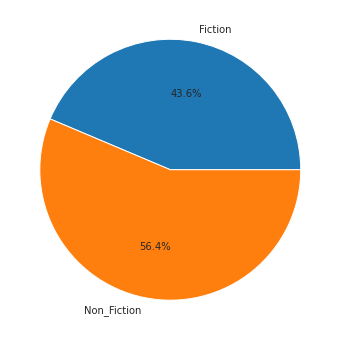

In [ ]:
#check genre distribution with pie chart
fiction = books_df[books_df['Genre']=='Fiction'].value_counts().sum()
non_fiction = books_df[books_df['Genre']=='Non Fiction'].value_counts().sum()

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct)

fig,axes=plt.subplots(1,1,figsize=(6,6))

value=[fiction,non_fiction]
plt.pie(value,autopct = lambda pct: func(pct, value), labels=['Fiction','Non_Fiction'])

# show plot
plt.show()

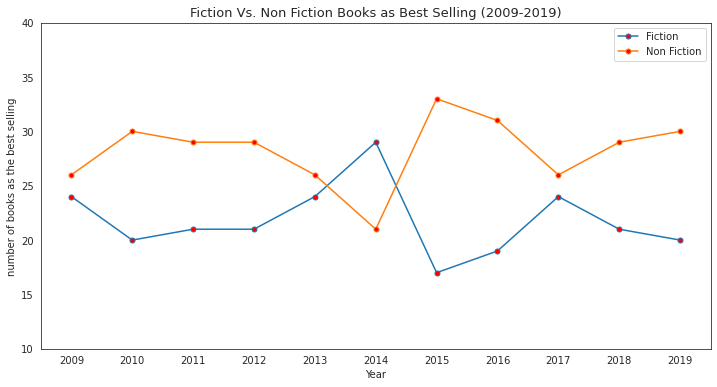

In [ ]:
books = books_df.groupby(['Year','Genre']).count().unstack()['Name']

fig,axes=plt.subplots(1,1,figsize=(12,6))
sns.set_style('white')
axes.plot(books,markersize=5,markerfacecolor='red',marker='o')
axes.set_xlabel('Year')
axes.set_ylabel('number of books as the best selling')
axes.set_xticks(books.index)
axes.set_ylim(10,40)
axes.legend(books)
axes.set_title('Fiction Vs. Non Fiction Books as Best Selling (2009-2019)',fontdict={'size':13})
plt.grid(0)

plt.show()


From these two plots, we know that most of the bestsellers are non-fiction. 56.4% of all bestsellers are non-fiction. Non-fiction also outperformed fiction in 10 out of 11 years.

##Best-selling Books Author

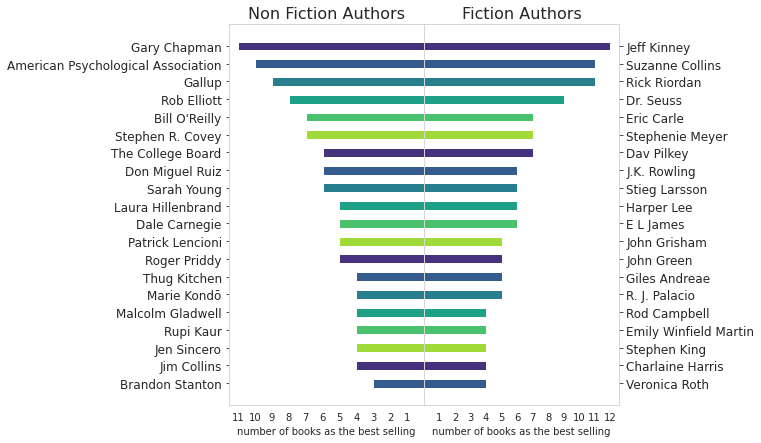

In [ ]:
best_nf_books = books_df.groupby(['Author', 'Genre']).count().unstack()['Name']['Non Fiction'].sort_values(ascending=False)[:20]
best_f_books = books_df.groupby(['Author', 'Genre']).count().unstack()['Name']['Fiction'].sort_values(ascending=False)[:20]


sns.set_style('whitegrid')

fig,axes = plt.subplots(1,2,figsize=(7,7))
plt.subplots_adjust(wspace=0)

axes[0].invert_xaxis()
axes[0].invert_yaxis()
axes[0].yaxis.tick_left()
axes[0].grid(None)
axes[0].set_xticks(range(1,int(best_nf_books.values.max())+1))
axes[0].barh(y=best_nf_books.index,width=best_nf_books.values,height=0.5,tick_label=best_nf_books.index,color=color)
axes[0].set_yticklabels(best_nf_books.index,fontsize=12)
axes[0].set_title('Non Fiction Authors',fontdict={'size':16})
axes[0].set_xlabel('number of books as the best selling',fontsize=10)

axes[1].set_xticks(range(1,int(best_f_books.values.max())+1))
axes[1].invert_yaxis()
axes[1].yaxis.tick_right()
axes[1].grid(None)
axes[1].barh(y=best_f_books.index,width=best_f_books.values,height=0.5,tick_label=best_f_books.index,color=color)
axes[1].set_yticklabels(best_f_books.index,fontsize=12)
axes[1].set_title('Fiction Authors',fontdict={'size':16})
axes[1].set_xlabel('number of books as the best selling',fontsize=10)

plt.show()

From the plot above, we can get information about which authors often produce best-selling books.

##Data Correlation

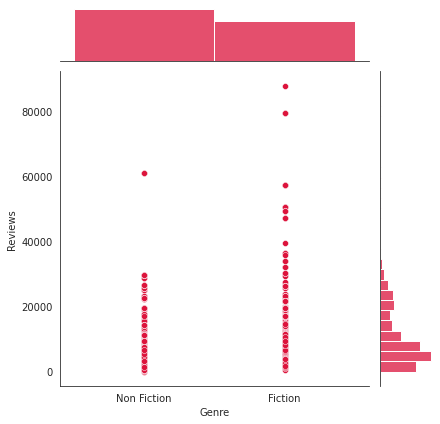

In [ ]:
#Correlation between genre and reviews
sns.jointplot(x='Genre',y='Reviews',data=books_df)
plt.show()

From this plot, we know that fiction is often reviewed by buyers

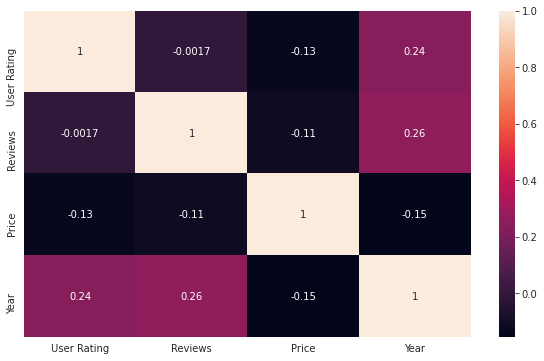

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(books_df.corr(),annot=True)
plt.show()

1. Reviews and user ratings correlation values closer to zero means there is no linear trend between the two variables.
2. Price and user ratings correlation have negative value means that price and rating have negative correlation.

##Price Preference

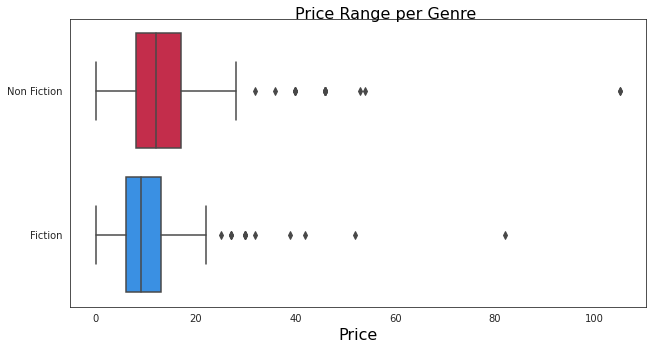

In [ ]:
fig = plt.figure(figsize=(8,4))

# axes
axes = fig.add_axes([0,0,1,1])

# boxplot
sns.boxplot(x=books_df['Price'], y=books_df['Genre'], ax=axes)


# lables
axes.set_xlabel('Price', fontsize=16, color='black')
axes.set_ylabel('')

# title
axes.text(40, -0.5, 'Price Range per Genre', color='Black', fontsize=16)

fig.show()

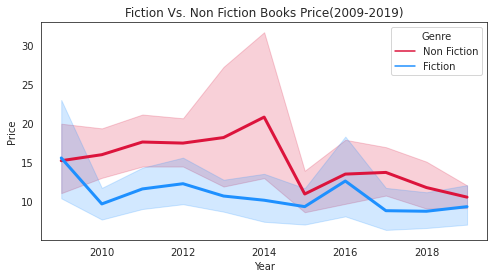

In [ ]:
fig = plt.figure(figsize=(8,4))

plt.title("Fiction Vs. Non Fiction Books Price(2009-2019)")
sns.lineplot(y="Price", x="Year",hue="Genre", data=books_df,linewidth=3)

From these figures above, we know that non-fiction books are relatively more expensive than fiction books. So, price doesn't really affect the type of bestseller. Although non-fiction books are more expensive, it still become best selling books 

##Books Popularity
In this section, we search most popular books by its review and its rating.

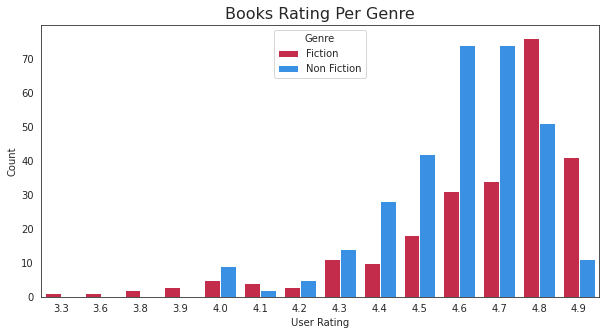

In [ ]:
Gen=books_df[["Genre","User Rating"]].value_counts().reset_index()
Gen.columns=["Genre","User Rating","Count"]
plt.figure(figsize=(10,5))
sns.barplot(hue=Gen["Genre"],x=Gen["User Rating"],y=Gen["Count"])
plt.title("Books Rating Per Genre",fontsize=16)
plt.show()

Booth of non-fiction and fiction books get good rating from buyer

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


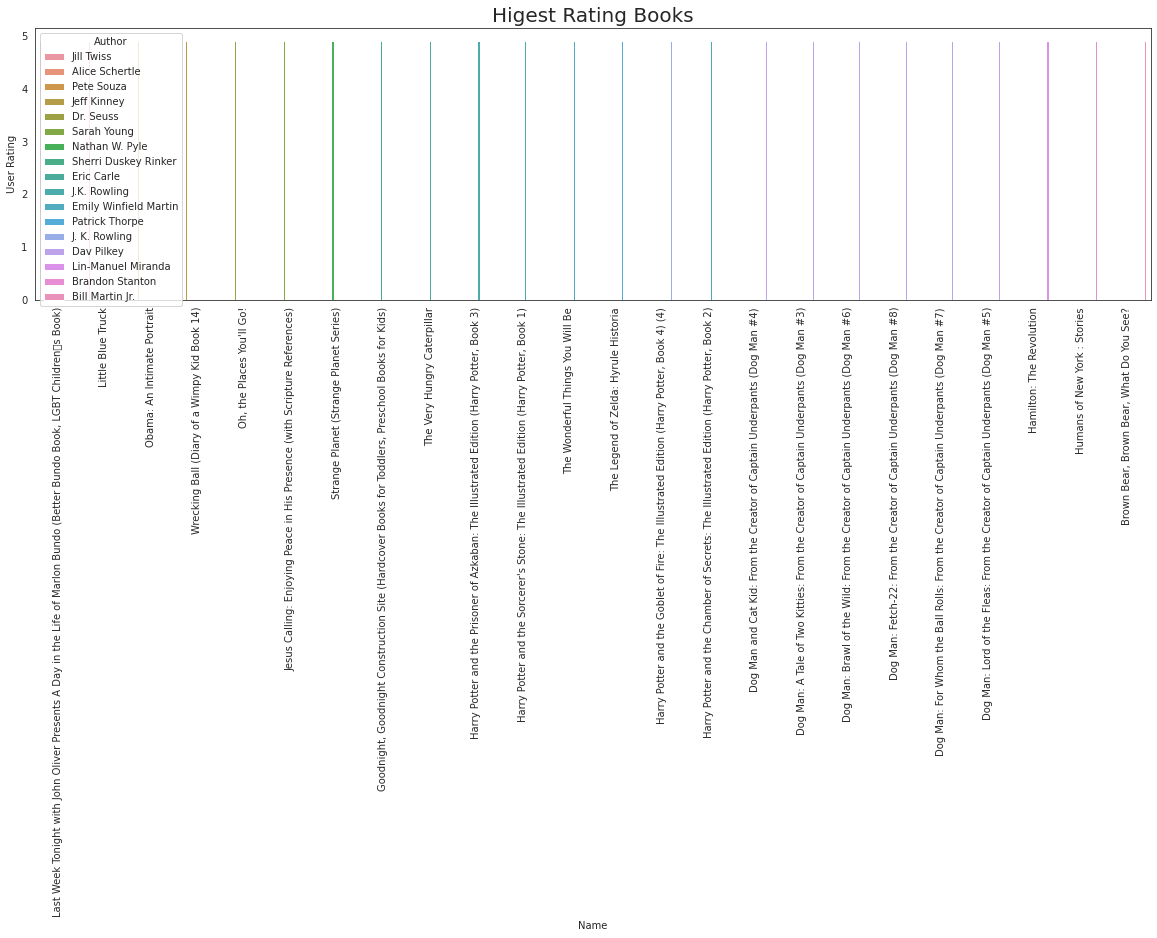

In [ ]:
top=books_df[["Name","User Rating","Author"]].sort_values(by="User Rating")[-40:].reset_index()
plt.figure(figsize=(20,5))
sns.barplot(x=top["Name"],y=top["User Rating"],hue=top["Author"])
plt.xticks(rotation=90)
plt.title("Higest Rating Books",fontsize=20)
plt.show()

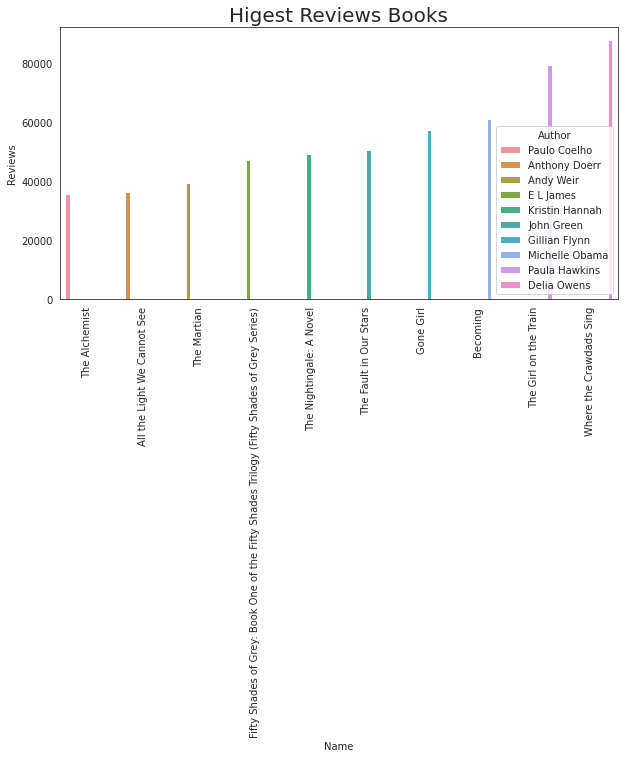

In [ ]:
top=books_df[["Name","Reviews","Author"]].sort_values(by="Reviews")[-20:].reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x=top["Name"],y=top["Reviews"],hue=top["Author"])
plt.xticks(rotation=90)
plt.title("Higest Reviews Books",fontsize=20)
plt.show()